# Tutorial on Hyperdimensional Computing
Translation to Python+numpy from https://michielstock.github.io/posts/2022/2022-10-04-HDVtutorial/

In [23]:
import math
import random
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import pandas as pd


In [24]:
N = 10000

def hdv() -> np.ndarray:
    return np.random.choice([-1, 1], size=N)

In [25]:
x = hdv()
x

array([-1, -1,  1, ...,  1, -1, -1], shape=(10000,))

In [26]:
y = hdv()
y

array([ 1,  1, -1, ..., -1, -1, -1], shape=(10000,))

In [27]:
np.sum(x == y)

np.int64(5029)

In [28]:
def hdv_m(rows: int) -> NDArray:
    return np.random.choice([-1, 1], size=(rows, N))

In [29]:
V = hdv_m(10)
V

array([[-1,  1, -1, ...,  1,  1, -1],
       [ 1,  1, -1, ...,  1, -1,  1],
       [-1, -1, -1, ..., -1, -1,  1],
       ...,
       [-1,  1, -1, ..., -1,  1, -1],
       [-1,  1, -1, ..., -1, -1,  1],
       [-1,  1, -1, ..., -1,  1, -1]], shape=(10, 10000))

## Bundling

In [30]:
def bundle_m(U: NDArray[int]) -> NDArray[int]:
    if U.ndim != 2:
        raise ValueError("U must be a 2d array.")

    return np.sign(np.sum(U, axis=0))

# example
U = np.array([[1, 2],
              [-3, 4],
              [50000, -6]])

result = bundle_m(U)
print(result)

[1 0]


In [31]:
bundle_m(V)

array([-1,  1, -1, ...,  0, -1,  1], shape=(10000,))

In [32]:
def bundle(*xs: NDArray[int]) -> NDArray[int]:
    summed = np.add.reduce(xs)
    return np.sign(summed)

# example
xs = bundle(np.array([1, 2]),
            np.array([-3, 4]),
            np.array([5, -6]))
print(xs)

[1 0]


In [33]:
bundle(x, y)

array([ 0,  0,  0, ...,  0, -1, -1], shape=(10000,))

## Binding

In [34]:
def bind(*xs: NDArray[int]):
    return np.multiply.reduce(xs)

# example
xs = bind(np.array([1, 2]), np.array([-3, 4]), np.array([5, -6]))
bind(xs)

array([-15, -48])

In [35]:
bind(x, y)

array([-1, -1, -1, ..., -1,  1,  1], shape=(10000,))

In [36]:
np.array_equal(bind(bind(x, y), y),
               x)

True

In [37]:
np.array_equal(bind(bind(x, y), x), y)

True

## Shifting

In [38]:
def shift(x, k=1):
    return np.roll(x, k)

# example
shift([1, 2, 3])

array([3, 1, 2])

## Similarity between HDVs

In [39]:
def cos_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

# example
cos_similarity([1, 2, 3],
               [4, 5, 6])

np.float64(0.9746318461970762)

In [40]:
cos_similarity(x, y)

np.float64(0.0058)

## Properties of the operations

In [41]:
z = hdv()

In [42]:
np.array_equal(bind(x, bundle(y, z)),
               bundle(bind(x, y), bind(x, z)))

True

In [43]:
np.array_equal(cos_similarity(x,y),
               cos_similarity(bind(x, z), bind(y, z)))

True

# Examples

## Example 1: color matching

### Data required by the example

In [44]:
import seaborn

n_colors = 50
reds = seaborn.color_palette("Reds", n_colors=n_colors)
blues = seaborn.color_palette("Blues", n_colors=n_colors)
greens = seaborn.color_palette("Greens", n_colors=n_colors)
oranges = seaborn.color_palette("Oranges", n_colors=n_colors)
greys = seaborn.color_palette("Greys", n_colors=n_colors)
yellows = seaborn.light_palette("Yellow", n_colors=n_colors)
whites = seaborn.light_palette("White", n_colors=n_colors)

emojis_colors = {
    '🚒': reds,
    '💦': blues,
    '🌱': greens,
    '🌅': oranges,
    '🐺': greys,
    '🍌': yellows,
    '🥚': whites
}

emojis = list(emojis_colors.keys())

toy_data1 = [(emoji := random.choice(emojis), random.choice(emojis_colors[emoji]))
             for _ in range(100)]

reds

[(0.9993848519800077, 0.9478662053056517, 0.922722029988466),
 (0.9987697039600154, 0.9349480968858132, 0.9042675893886967),
 (0.9981545559400231, 0.9220299884659746, 0.8858131487889274),
 (0.9975394079200308, 0.9091118800461361, 0.867358708189158),
 (0.9969242599000384, 0.8961937716262975, 0.8489042675893886),
 (0.9963091118800461, 0.883275663206459, 0.8304498269896193),
 (0.9953094963475586, 0.8642060745866974, 0.8046905036524413),
 (0.994079200307574, 0.8414455978469819, 0.7745482506728181),
 (0.9928489042675894, 0.8186851211072664, 0.7444059976931949),
 (0.9916186082276048, 0.795924644367551, 0.7142637447135717),
 (0.9903883121876201, 0.7731641676278354, 0.6841214917339484),
 (0.9891580161476355, 0.75040369088812, 0.6539792387543253),
 (0.9882352941176471, 0.7270280661284121, 0.6241445597846982),
 (0.9882352941176471, 0.7018069973087273, 0.5952326028450596),
 (0.9882352941176471, 0.6765859284890426, 0.566320645905421),
 (0.9882352941176471, 0.6513648596693579, 0.5374086889657824),
 (0.9882352941176471, 0.6261437908496732, 0.5084967320261438),
 (0.9882352941176471, 0.6009227220299885, 0.4795847750865053),
 (0.9882352941176471, 0.5757016532103036, 0.4506728181468666),
 (0.9876970396001539, 0.5510188389081122, 0.4255286428296809),
 (0.9870818915801615, 0.5264129181084198, 0.40092272202998847),
 (0.9864667435601692, 0.5018069973087274, 0.3763168012302961),
 (0.9858515955401769, 0.477201076509035, 0.3517108804306036),
 (0.9852364475201845, 0.4525951557093426, 0.32710495963091124),
 (0.9846212995001922, 0.42798923490965013, 0.30249903883121876),
 (0.9806228373702421, 0.40123029603998467, 0.2809688581314879),
 (0.9732410611303345, 0.37231833910034606, 0.2625144175317186),
 (0.9658592848904267, 0.34340638216070746, 0.24405997693194925),
 (0.9584775086505191, 0.31449442522106885, 0.22560553633217995),
 (0.9510957324106113, 0.2855824682814302, 0.2071510957324106),
 (0.9437139561707035, 0.25667051134179164, 0.18869665513264128),
 (0.9344867358708189, 0.2286812764321415, 0.17139561707035755),
 (0.9123414071510957, 0.2071510957324106, 0.1621683967704729),
 (0.8901960784313725, 0.18562091503267975, 0.15294117647058825),
 (0.8680507497116493, 0.16409073433294888, 0.14371395617070357),
 (0.8459054209919262, 0.14256055363321812, 0.13448673587081897),
 (0.8237600922722029, 0.12103037293348712, 0.12525951557093426),
 (0.8016147635524797, 0.09950019223375625, 0.1160322952710496),
 (0.7785467128027681, 0.08996539792387544, 0.11003460207612456),
 (0.7551710880430603, 0.08442906574394464, 0.10511341791618607),
 (0.7317954632833525, 0.07889273356401384, 0.10019223375624758),
 (0.7084198385236448, 0.07335640138408304, 0.09527104959630911),
 (0.685044213763937, 0.06782006920415225, 0.09034986543637061),
 (0.6616685890042292, 0.06228373702422145, 0.08542868127643213),
 (0.6327566320645905, 0.05536332179930796, 0.08050749711649365),
 (0.5946174548250673, 0.04613610149942329, 0.07558631295655516),
 (0.556478277585544, 0.03690888119953864, 0.07066512879661667),
 (0.5183391003460208, 0.02768166089965398, 0.06574394463667818),
 (0.4801999231064975, 0.01845444059976932, 0.06082276047673971),
 (0.44206074586697425, 0.00922722029988466, 0.05590157631680122)]

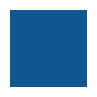

In [45]:
def randcol():
    return np.random.rand(3)

def show_color(color):
    plt.figure(figsize=(1,1))
    plt.imshow([[color]])
    plt.axis('off')
    plt.show()

acolor = randcol()
show_color(acolor)

In [46]:
emojis_hdvs = {emoji: hdv() for emoji in emojis}

In [47]:
def range_hdvs(steps):
    k = len(steps) - 1

    V = hdv_m(k + 1)  # V size is (k+1)xN

    for i in range(1, k + 1):  # for each other row/step
        for j in range(N):     # for each column
            V[i, j] = -V[i-1, j] if random.random() < (1 / k) else V[i-1, j]

    return V


In [48]:
color_steps = np.arange(0, 1.05, 0.05)

In [49]:
reds_hdv = range_hdvs(color_steps)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
V0,0.1228,0.1416,0.1582,0.1762,0.1942,0.2126,0.2414,0.2540,0.2842,0.3130,...,0.3816,0.4258,0.4812,0.5310,0.5906,0.6584,0.7354,0.8168,0.9038,1.0000
V1,0.1378,0.1590,0.1764,0.1948,0.2160,0.2360,0.2668,0.2866,0.3212,0.3536,...,0.4290,0.4756,0.5322,0.5912,0.6568,0.7306,0.8132,0.9010,1.0000,0.9038
V2,0.1524,0.1732,0.1890,0.2106,0.2374,0.2590,0.2926,0.3180,0.3534,0.3906,...,0.4768,0.5306,0.5940,0.6550,0.7274,0.8100,0.9030,1.0000,0.9010,0.8168
V3,0.1670,0.1898,0.2092,0.2324,0.2560,0.2812,0.3152,0.3474,0.3884,0.4280,...,0.5254,0.5856,0.6582,0.7276,0.8076,0.8978,1.0000,0.9030,0.8132,0.7354
V4,0.1940,0.2160,0.2374,0.2590,0.2810,0.3066,0.3462,0.3832,0.4298,0.4770,...,0.5876,0.6538,0.7340,0.8098,0.8998,1.0000,0.8978,0.8100,0.7306,0.6584
V5,0.2142,0.2378,0.2612,0.2888,0.3144,0.3404,0.3848,0.4294,0.4832,0.5332,...,0.6518,0.7256,0.8122,0.8976,1.0000,0.8998,0.8076,0.7274,0.6568,0.5906
V6,0.2302,0.2570,0.2824,0.3152,0.3452,0.3752,0.4256,0.4762,0.5344,0.5912,...,0.7238,0.8080,0.9046,1.0000,0.8976,0.8098,0.7276,0.6550,0.5912,0.5310
V7,0.2576,0.2844,0.3126,0.3474,0.3814,0.4146,0.4674,0.5236,0.5894,0.6550,...,0.8040,0.8946,1.0000,0.9046,0.8122,0.7340,0.6582,0.5940,0.5322,0.4812
V8,0.2902,0.3190,0.3512,0.3892,0.4272,0.4676,0.5248,0.5858,0.6584,0.7332,...,0.8990,1.0000,0.8946,0.8080,0.7256,0.6538,0.5856,0.5306,0.4756,0.4258
V9,0.3212,0.3532,0.3922,0.4326,0.4718,0.5194,0.5842,0.6524,0.7346,0.8170,...,1.0000,0.8990,0.8040,0.7238,0.6518,0.5876,0.5254,0.4768,0.4290,0.3816


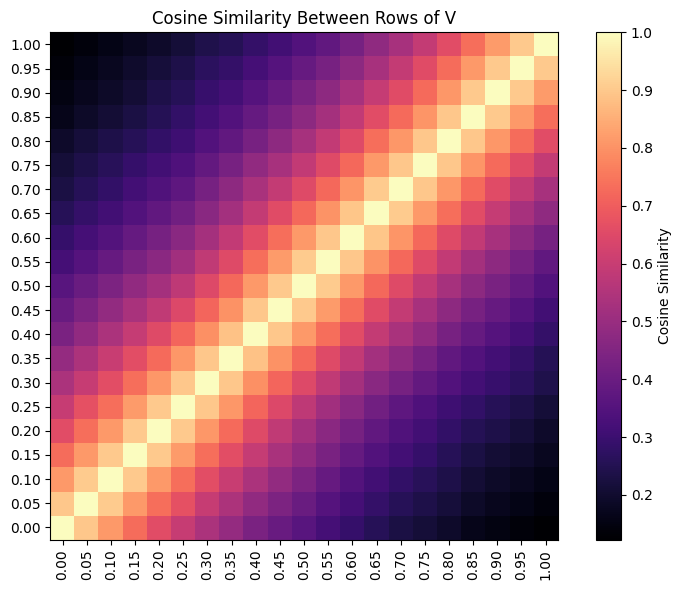

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la matriz de similaridad coseno
cos_sim_matrix = cosine_similarity(reds_hdv)
cos_sim_matrix = cos_sim_matrix[::-1, :]

# Representar la matriz de similaridad como DataFrame para mejor visualización
df_cos_sim = pd.DataFrame(cos_sim_matrix,
                          index=[f"V{i}" for i in range(reds_hdv.shape[0])],
                          columns=[f"V{i}" for i in range(reds_hdv.shape[0])])

# Mostrar en formato tabla
display(df_cos_sim)

# Representar la matriz de similaridad coseno con un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(cos_sim_matrix, cmap='magma', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title("Cosine Similarity Between Rows of V")
plt.xticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps], rotation=90)
plt.yticks(ticks=np.arange(len(color_steps)),
           labels=[f"{val:.2f}" for val in color_steps[::-1]])

plt.tight_layout()
plt.show()


In [51]:
greens_hdv = range_hdvs(color_steps)
blues_hdv = range_hdvs(color_steps)

In [52]:
def col_ind(component):
    return round(component * 20)

def encode_col(color):
    return bind(reds_hdv[col_ind(color[0])],
                greens_hdv[col_ind(color[1])],
                blues_hdv[col_ind(color[2])])

In [53]:
colhdv = encode_col(acolor)

In [54]:
ref_colors = [{'color':c, 'hdv':encode_col(c)} for c in [randcol() for _ in range(1000)]]

In [55]:
def decode_colors(v):
    best_match = max(ref_colors, key=lambda item: cos_similarity(v, item["hdv"]))
    show_color(best_match["color"])
    return best_match["color"]

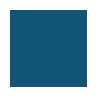

array([0.06837771, 0.33175334, 0.46596339])

In [56]:
decode_colors(colhdv)

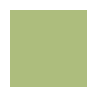

array([0.68050026, 0.74343693, 0.49326931])

In [57]:
decode_colors(hdv())

In [58]:
def encode_emoji_col_pair(s, c):
    return bind(emojis_hdvs[s], encode_col(c))

In [59]:
col_emoji_hdvs = [encode_emoji_col_pair(s, c) for s, c in toy_data1]

In [60]:
toy_data_emb = bundle(*col_emoji_hdvs)

In [61]:
bind(toy_data_emb, emojis_hdvs['🚒'])

array([ 0,  1, -1, ..., -1, -1, -1], shape=(10000,))

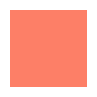

array([0.99594228, 0.49927096, 0.40756191])

In [62]:
decode_colors(bind(toy_data_emb, emojis_hdvs['🚒']))

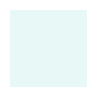

array([0.91298986, 0.97291318, 0.96711161])

In [63]:
decode_colors(bind(toy_data_emb, emojis_hdvs['💦']))

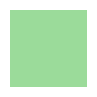

array([0.60890573, 0.86209706, 0.60674238])

In [64]:
decode_colors(bind(toy_data_emb, emojis_hdvs['🌱']))

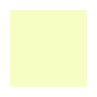

array([0.97181433, 0.99913183, 0.77094574])

In [65]:
decode_colors(bind(toy_data_emb, emojis_hdvs['🍌']))

## Example 1.1: color matching with noise

### Data required for this example

In [66]:
toy_data2 = [
    (
        emoji := random.choice(emojis),
        random.sample(
            [
                random.choice(emojis_colors[emoji]),
                randcol(),
                randcol()
            ],
            3
        )
    )
    for _ in range(500)
]

In [67]:
def encode_shape_col_pair2(s, colors):
    return bind(emojis_hdvs[s], bundle(*map(encode_col, colors)))

In [68]:
toy_data_emb2 = bundle(*[encode_shape_col_pair2(s, colors) for s, colors in toy_data2])

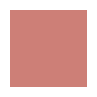

array([0.80453258, 0.49976871, 0.46730163])

In [69]:
decode_colors(bind(toy_data_emb2, emojis_hdvs['🚒']))

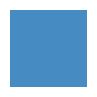

array([0.27834859, 0.54946129, 0.76513972])

In [70]:
decode_colors(bind(toy_data_emb2, emojis_hdvs['💦']))

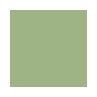

array([0.62424508, 0.70859061, 0.52010193])

In [71]:
decode_colors(bind(toy_data_emb2, emojis_hdvs['🌱']))

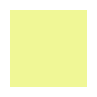

array([0.94141823, 0.96985192, 0.59022178])

In [72]:
decode_colors(bind(toy_data_emb2, emojis_hdvs['🍌']))

## Example 2: Recipes